### Motors AS active customers data 
- Definition of Active customer: 최근 15개월내 AS 재입고 차량 대수 
- 기준일자: 2.24. 7/21 (recent 15 months = 2023.4/22 ~ 2024. 7/21)
- raws: 54,540
- data 추출: 이용철 대리 

In [4]:
#import pkg's & data loading 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings 
warnings.filterwarnings('ignore')
import pyarrow

df = pd.read_parquet('data/motors_as_active4.parquet', engine='pyarrow')
print(df.shape)
df.head(2).T

(48162, 26)


,0,1
vin,5UX33DT08N9M34224,5UX43DT02N9N10833
as_branch,AS_천안,AS_천안
customer,김예지,ahn chi hoon david
tel_no,1073180152,1095821006
addr_1,충남,충남
addr_2,아산시,아산시
full_address,"충남 아산시 둔포면 아산밸리남로 81 802동 401호 (석곡리,아산테크노밸리 이지...",충청남도 아산시 둔포면 아산밸리남로 32-44 4호
DELIVERY_DEALER_NAME,None,None
DELIVERY_SHOWROOM_NAME,None,None
PERSON_GUBUN,개인,개인


--- 
### 박사님 지시사항 (2024.08.22)
- 3. 핵심지역 고객 분석 ~ 서울/성남/수원/용인 지역 고객들에게 어떤 특성이 존재하는가?
  - eg. 어느 AS센터를 많이 방문했는가? 출고 딜러사의 당/타사 비중은?, AS센터를 방문한 이유는? 
  - eg. 평균 마일리지(주행거리)는? 
---

In [5]:
df['addr_2'].unique()

array(['아산시', '화성시', '평택시', '오산시', '세종시', '과천시', '천안시', '수원시', '청주시',
       '의왕시', '안양시', '용인시', '여주시', '인천시', '안산시', '서울시', '군포시', '공주시',
       '안성시', '대구시', '구리시', '대전시', '서산시', '남양주시', '시흥시', '광명시', '제천시',
       '하남시', '성남시', '인제군', '진천군', '원주시', '경산시', '부산시', '증평군', '경주시',
       '충주시', '이천시', '고양시', '전주시', '계룡시', '당진시', '홍성군', '보령시', '금산군',
       '예산군', '광주시', '음성군', '부여군', '논산시', '영암군', '양주시', '태백시', '부천시',
       '함양군', '봉화군', '광양시', '괴산군', '단양군', '평창군', '보은군', '양평군', '김포시',
       '양산시', '영주시', '포항시', '파주시', '칠곡군', '상주시', '창녕군', '군산시', '울산시',
       '거제시', '구미시', '거창군', '순천시', '청양군', '가평군', '연천군', '강릉시', '목포시',
       '김천시', '태안군', '여수시', '하동군', '완주군', '동해시', '포천시', '안동시', '영동군',
       '옥천군', '익산시', '서천군', '문경시', '창원시', '의정부시', '청원군', '동두천시', '삼척시',
       '김해시', '제주시', '예천군', '광주시(경기)', '정읍시', '군위군', '울진군', '통영시', '무주군',
       '춘천시', '속초시', '나주시', '성주군', '해남군', '진주시', '고성군', '서귀포시', '고흥군',
       '곡성군', '영광군', '남원시', '순창군', '김제시', '부안군', '영천시', '산청군', '마산시',
       '홍천군'

In [6]:
## 주소지가 서울/성남/수원/용인지역인 데이터 분리 
df_seoul = df[df['addr_2'] == '서울시'] 
df_sungnam = df[df['addr_2'] == '성남시'] 
df_suwon = df[df['addr_2'] == '수원시'] 
df_yongin = df[df['addr_2'] == '용인시'] 

print('- 서울시 고객(명) = ', df_seoul.shape[0])
print('- 성남시 고객(명) = ', df_sungnam.shape[0])
print('- 수원시 고객(명)  = ', df_suwon.shape[0])
print('- 용인시 고객(명)  = ', df_yongin.shape[0])

print('-------------------------------------------------')

df_4city = df[df['addr_2'].isin(['서울시', '성남시', '수원시', '용인시'])] 

print('- 4개 지역 고객수 합계(명) = ', df_4city.shape[0])

- 서울시 고객(명) =  1829
- 성남시 고객(명) =  333
- 수원시 고객(명)  =  1749
- 용인시 고객(명)  =  991
-------------------------------------------------
- 4개 지역 고객수 합계(명) =  4902


---
#### 1. 전체 vs 서울/성남/수원/용인 고객들의 출고 딜러사비교 
---

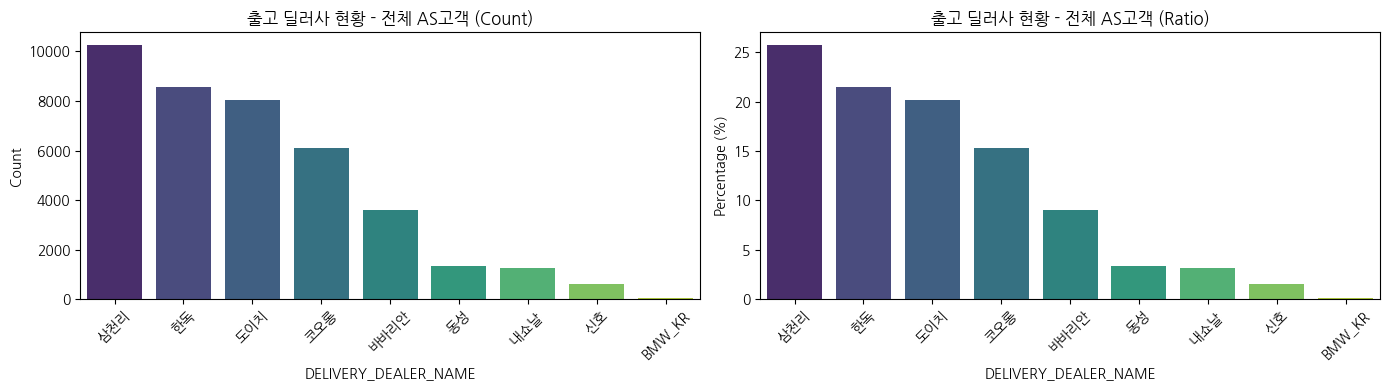

In [7]:
## 출고 딜러사 비교 - 전체고객 

# 1. 'DELIVERY_DEALER_NAME'의 개수와 비율을 계산
origin_counts = df['DELIVERY_DEALER_NAME'].value_counts()
origin_ratios = df['DELIVERY_DEALER_NAME'].value_counts(normalize=True) * 100  # 비율 계산 (퍼센트로 변환)

# 2. 시각화를 위한 서브플롯 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# 3. 첫 번째 그래프 - 딜러사 별 고객 수 (Count)
sns.barplot(x=origin_counts.index, y=origin_counts.values, palette="viridis", ax=axes[0])
axes[0].set_title('출고 딜러사 현황 - 전체 AS고객 (Count)')
axes[0].set_xlabel('DELIVERY_DEALER_NAME')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# 4. 두 번째 그래프 - 딜러사 별 고객 비율 (Ratio)
sns.barplot(x=origin_ratios.index, y=origin_ratios.values, palette="viridis", ax=axes[1])
axes[1].set_title('출고 딜러사 현황 - 전체 AS고객 (Ratio)')
axes[1].set_xlabel('DELIVERY_DEALER_NAME')
axes[1].set_ylabel('Percentage (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

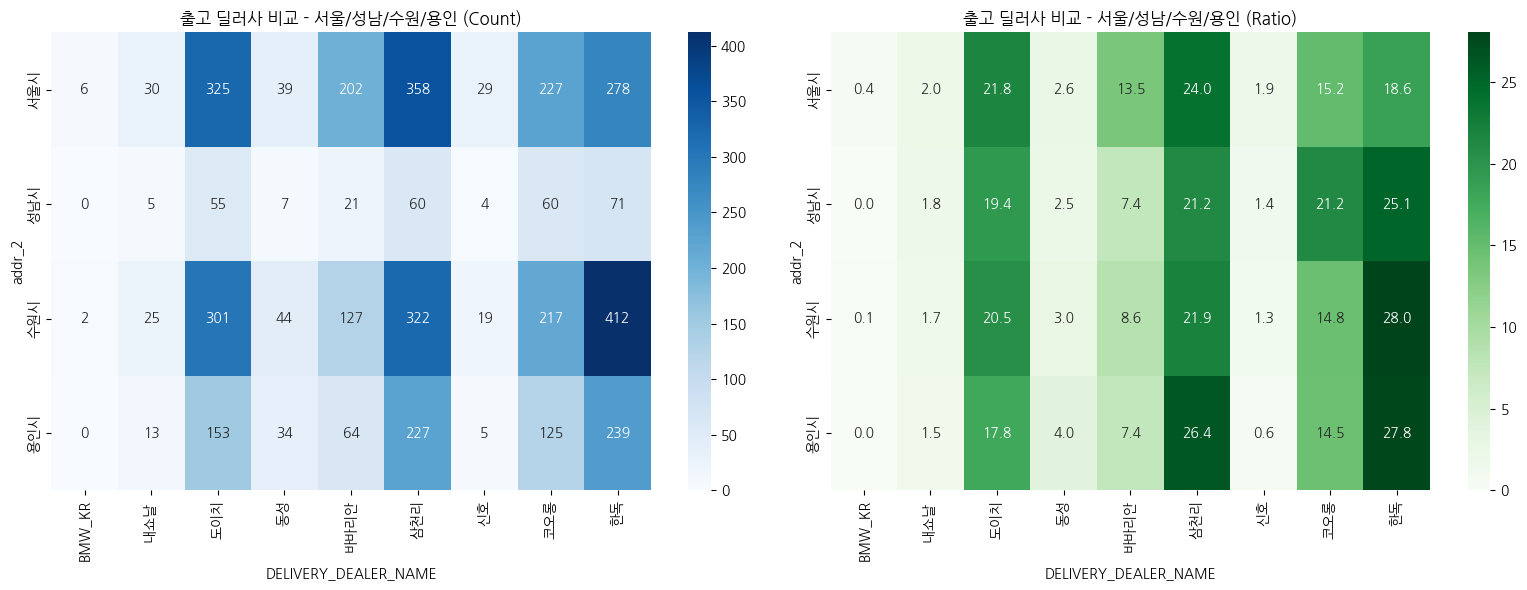

In [8]:
## 출고 딜러사 비교 - 서울/성남/수원/용인

# 1. 데이터프레임에서 'addr_2'별로 'DELIVERY_DEALER_NAME'의 개수를 계산
origin_counts = df_4city.groupby(['addr_2', 'DELIVERY_DEALER_NAME']).size().reset_index(name='count')

# 2. 피벗 테이블로 변환하여 시각화에 적합한 형태로 만듦
origin_pivot = origin_counts.pivot(index='addr_2', columns='DELIVERY_DEALER_NAME', values='count').fillna(0)

# 3. 각 'addr_2'별로 비율을 계산
origin_ratio_pivot = origin_pivot.div(origin_pivot.sum(axis=1), axis=0) * 100

# 4. 시각화를 위한 서브플롯 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 5. 첫 번째 히트맵 - 숫자 히트맵
sns.heatmap(origin_pivot, cmap="Blues", annot=True, fmt="g", ax=axes[0])
axes[0].set_title('출고 딜러사 비교 - 서울/성남/수원/용인 (Count)')
axes[0].set_xlabel('DELIVERY_DEALER_NAME')
axes[0].set_ylabel('addr_2')

# 6. 두 번째 히트맵 - 비율 히트맵
sns.heatmap(origin_ratio_pivot, cmap="Greens", annot=True, fmt=".1f", ax=axes[1])
axes[1].set_title('출고 딜러사 비교 - 서울/성남/수원/용인 (Ratio)')
axes[1].set_xlabel('DELIVERY_DEALER_NAME')
axes[1].set_ylabel('addr_2')

plt.tight_layout()

- 당사 AS고객은 당연히 당사 출고고객이 25%수준으로 가장 많고, 그다음 한독과 도이치가 각 20% 초반대를 차지함 
- 핵심지역 거주 고객들만을 대상으로 살펴보아도 전체와 유사한 추세이나, 서울은 바바리안, 수원/용인은 한독의 비중이 평균대비 살짝 높음 (해당지역의 딜러사 점유율 때문?)

---
#### 2. 전체 vs 서울/성남/수원/용인 고객들의 입고당시 주행거리 비교 
---

In [9]:
## 입고당시 주행거리 
print('- 전체AS고객 ENTERING_MILEAGE 평균 =', df['ENTERING_MILEAGE'].mean())
print('- 전체AS고객 ENTERING_MILEAGE 표준편차 =', df['ENTERING_MILEAGE'].std())
print('------------------------------------------------------------------------')

mileage_stats = df.groupby('addr_2')['ENTERING_MILEAGE'].agg(['mean', 'std']).reset_index()
mileage_stats2 = mileage_stats[mileage_stats['addr_2'].isin(['서울시', '성남시', '수원시', '용인시'])]
mileage_stats2


- 전체AS고객 ENTERING_MILEAGE 평균 = 64310.237482422126
- 전체AS고객 ENTERING_MILEAGE 표준편차 = 57936.886797036845
------------------------------------------------------------------------


,addr_2,mean,std
56,서울시,66407.268347,58945.956465
58,성남시,58200.953416,50970.460356
62,수원시,64703.681364,60055.807266
92,용인시,61706.715164,58150.503184


<ErrorbarContainer object of 3 artists>

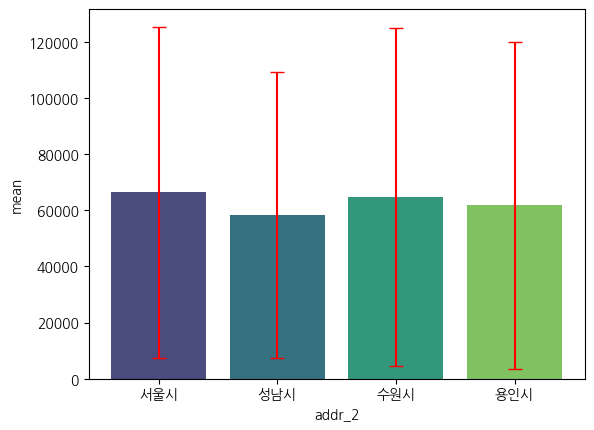

In [10]:
# 평균 막대 그래프
sns.barplot(x='addr_2', y='mean', data=mileage_stats2, palette="viridis", ci=None)
plt.errorbar(x=mileage_stats2['addr_2'], y=mileage_stats2['mean'], yerr=mileage_stats2['std'], fmt='none', c='red', capsize=5, label='Standard Deviation')

- 평균적으로 6만km 전후로 입고되었으며, 고객의 주소지별로 유의미한 차이는 발견하지 못했음 

--- 
#### 3-1. 서울고객 상세 분석
---

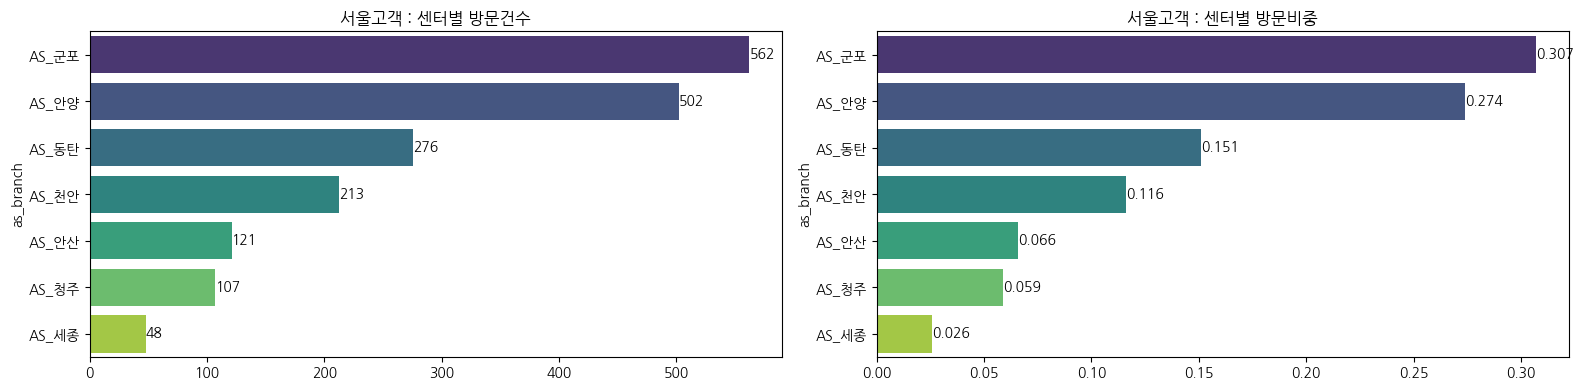

In [11]:
## 서울고객은 어느 센터를 많이 방문했는가? 

# 건수와 비중 데이터 생성
cnt_addr2_1 = df_seoul['as_branch'].value_counts()
cnt_addr2_2 = df_seoul['as_branch'].value_counts(normalize=True).round(3)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_1.values, y=cnt_addr2_1.index, palette="viridis", ax=axes[0])
axes[0].set_title('서울고객 : 센터별 방문건수')

for index, value in enumerate(cnt_addr2_1.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_2.values, y=cnt_addr2_2.index, palette="viridis", ax=axes[1])
axes[1].set_title('서울고객 : 센터별 방문비중')

for index, value in enumerate(cnt_addr2_2.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

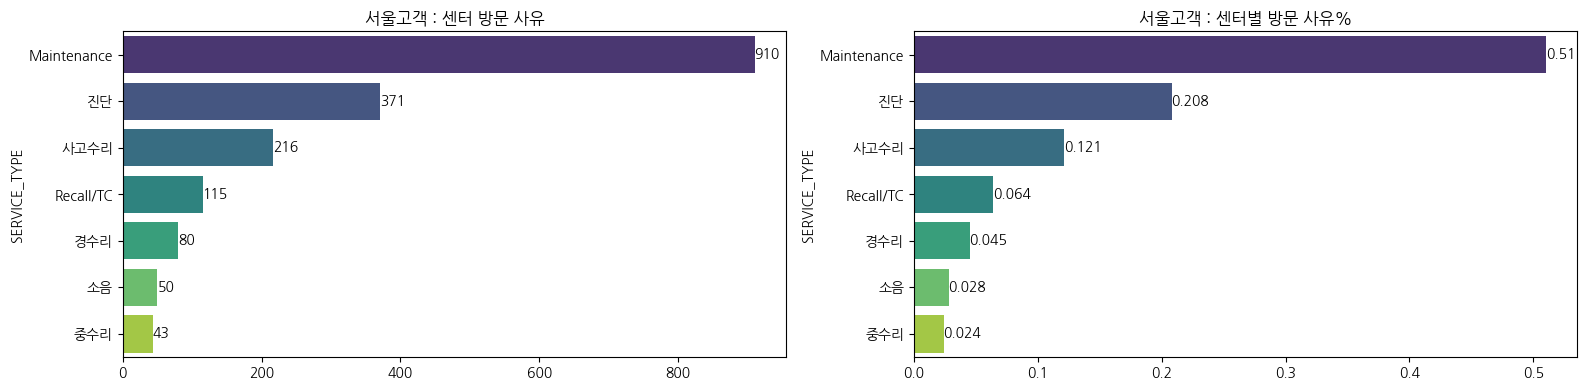

In [13]:
## 서울고객은 어떤 이유로 센터를 방문했는가?(서비스 타입)

# 건수와 비중 데이터 생성
cnt_addr2_3 = df_seoul['SERVICE_TYPE'].value_counts()
cnt_addr2_4 = df_seoul['SERVICE_TYPE'].value_counts(normalize=True).round(3)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_3.values, y=cnt_addr2_3.index, palette="viridis", ax=axes[0])
axes[0].set_title('서울고객 : 센터 방문 사유')

for index, value in enumerate(cnt_addr2_3.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_4.values, y=cnt_addr2_4.index, palette="viridis", ax=axes[1])
axes[1].set_title('서울고객 : 센터별 방문 사유%')

for index, value in enumerate(cnt_addr2_4.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

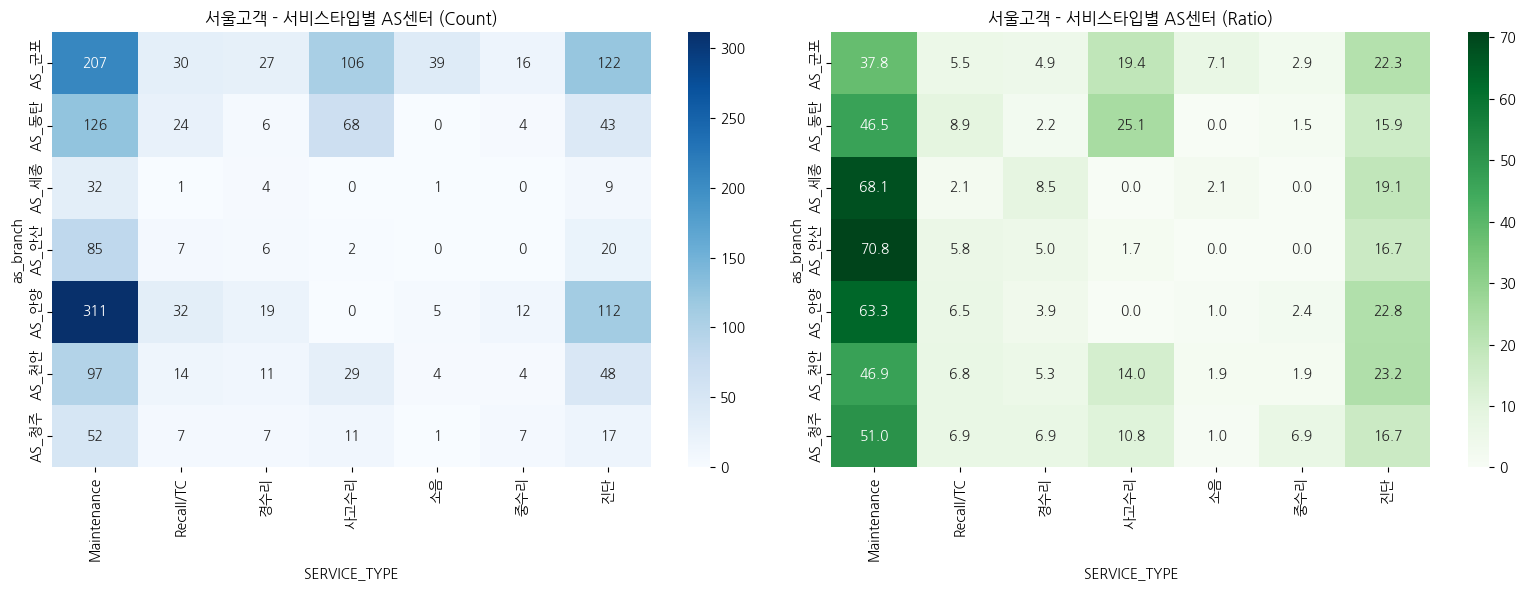

In [21]:
## 서울고객의 센터 방문 사유 x 센터별

svc_counts = df_seoul.groupby(['as_branch', 'SERVICE_TYPE']).size().reset_index(name='count')
svc_pivot = svc_counts.pivot(index='as_branch', columns='SERVICE_TYPE', values='count').fillna(0)
svc_ratio_pivot = svc_pivot.div(svc_pivot.sum(axis=1), axis=0) * 100
#svc_ratio_pivot = svc_pivot.div(svc_pivot.sum(axis=0), axis=1) * 100    #각 서비스 타입을 기준으로 어느센터를 많이 갔는지 보려면 ...  


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(svc_pivot, cmap="Blues", annot=True, fmt="g", ax=axes[0])
axes[0].set_title('서울고객 - 서비스타입별 AS센터 (Count)')
axes[0].set_xlabel('SERVICE_TYPE')
axes[0].set_ylabel('as_branch')

sns.heatmap(svc_ratio_pivot, cmap="Greens", annot=True, fmt=".1f", ax=axes[1])
axes[1].set_title('서울고객 - 서비스타입별 AS센터 (Ratio)')
axes[1].set_xlabel('SERVICE_TYPE')
axes[1].set_ylabel('as_branch')

plt.tight_layout()

- 서울 고객들은 군포 > 안양 > 동탄 순으로 많이 방문하였음 
- 방문 사유별로는 maintanance와 진단을 위해 안양과 군포를, 사고수리를 위해서는 군포와 동탄을 많이 방문

--- 
#### 3-2. 성남고객 상세 분석
---

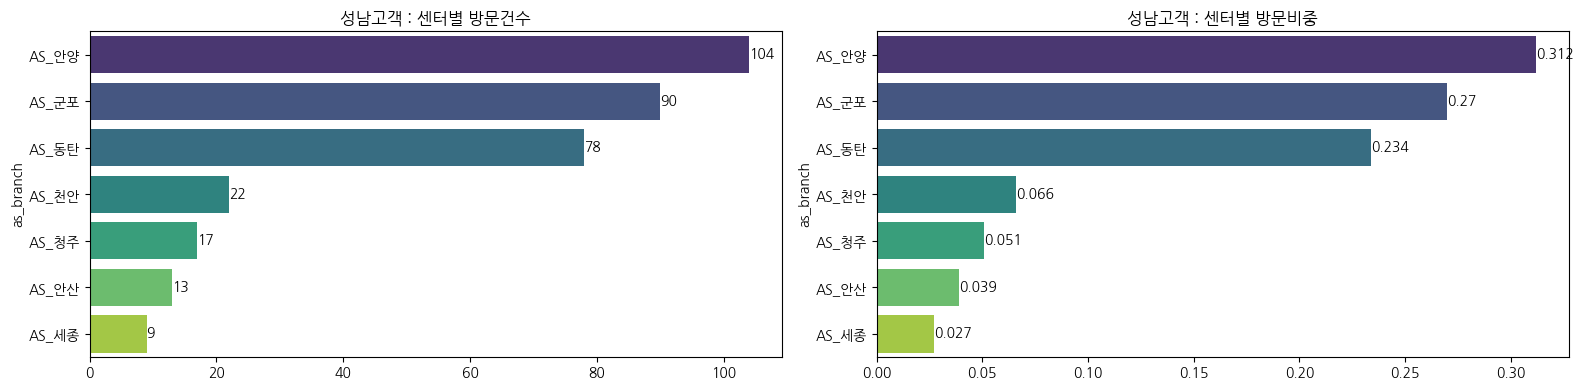

In [23]:
## 성남고객은 어느 센터를 많이 방문했는가? 

# 건수와 비중 데이터 생성
cnt_addr2_1 = df_sungnam['as_branch'].value_counts()
cnt_addr2_2 = df_sungnam['as_branch'].value_counts(normalize=True).round(3)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_1.values, y=cnt_addr2_1.index, palette="viridis", ax=axes[0])
axes[0].set_title('성남고객 : 센터별 방문건수')

for index, value in enumerate(cnt_addr2_1.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_2.values, y=cnt_addr2_2.index, palette="viridis", ax=axes[1])
axes[1].set_title('성남고객 : 센터별 방문비중')

for index, value in enumerate(cnt_addr2_2.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

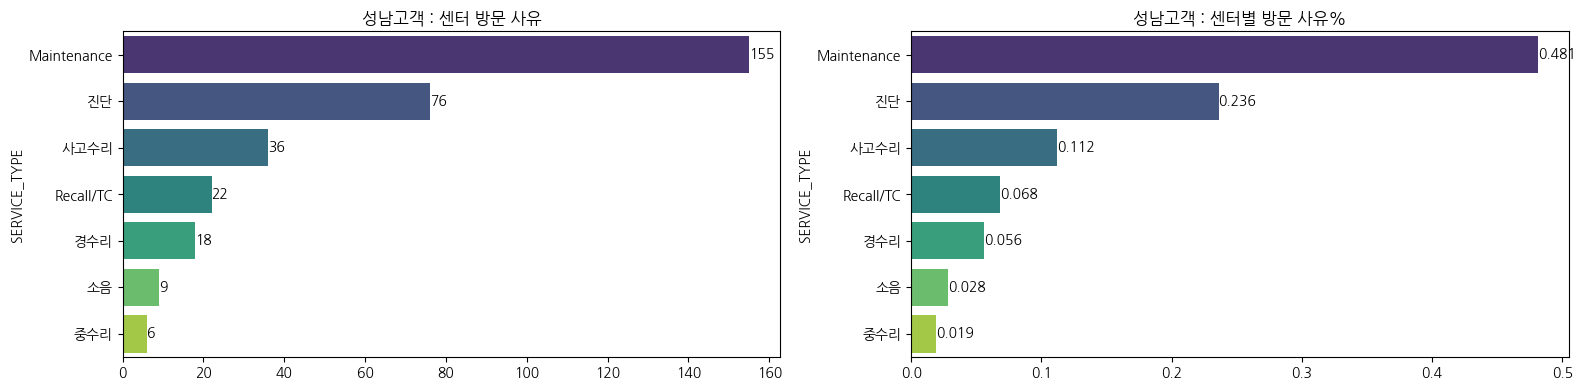

In [24]:
## 성남고객은 어떤 이유로 센터를 방문했는가?(서비스 타입)

# 건수와 비중 데이터 생성
cnt_addr2_3 = df_sungnam['SERVICE_TYPE'].value_counts()
cnt_addr2_4 = df_sungnam['SERVICE_TYPE'].value_counts(normalize=True).round(3)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_3.values, y=cnt_addr2_3.index, palette="viridis", ax=axes[0])
axes[0].set_title('성남고객 : 센터 방문 사유')

for index, value in enumerate(cnt_addr2_3.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_4.values, y=cnt_addr2_4.index, palette="viridis", ax=axes[1])
axes[1].set_title('성남고객 : 센터별 방문 사유%')

for index, value in enumerate(cnt_addr2_4.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

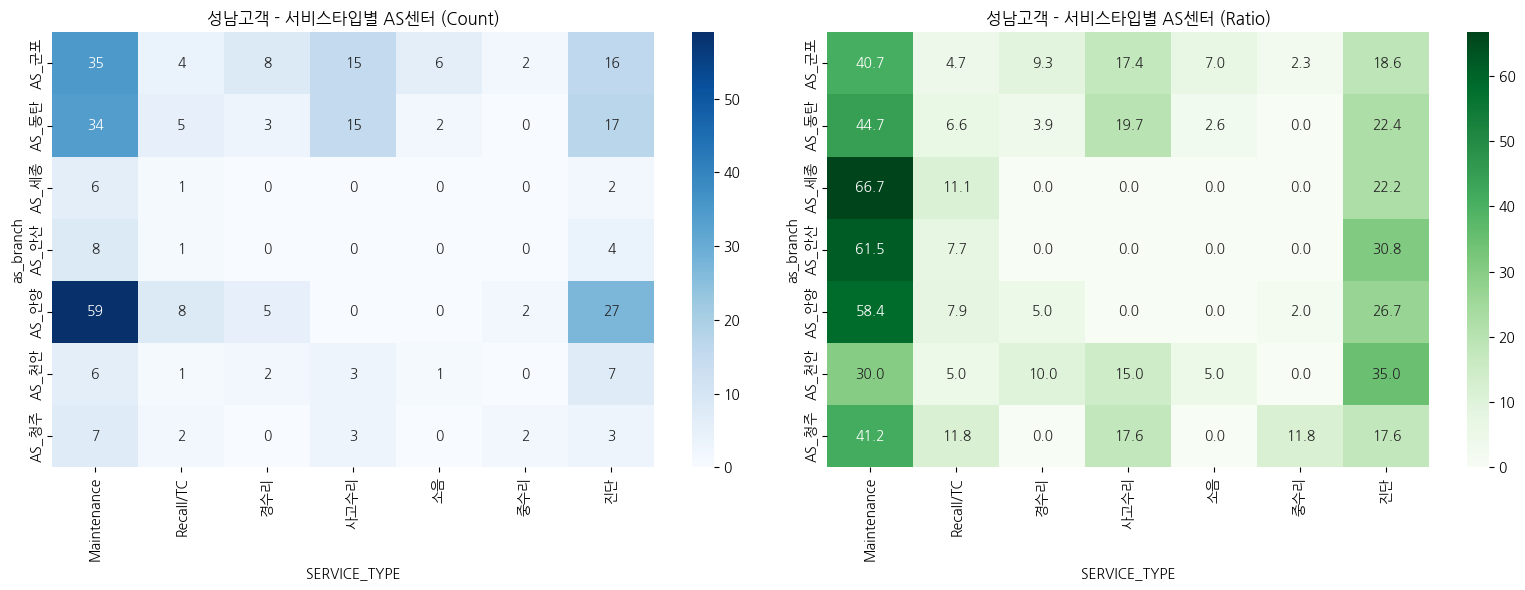

In [25]:
# 성남고객의 센터 방문 사유 x 센터별

svc_counts = df_sungnam.groupby(['as_branch', 'SERVICE_TYPE']).size().reset_index(name='count')
svc_pivot = svc_counts.pivot(index='as_branch', columns='SERVICE_TYPE', values='count').fillna(0)
svc_ratio_pivot = svc_pivot.div(svc_pivot.sum(axis=1), axis=0) * 100
#svc_ratio_pivot = svc_pivot.div(svc_pivot.sum(axis=0), axis=1) * 100    #각 서비스 타입을 기준으로 어느센터를 많이 갔는지 보려면 ...  


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(svc_pivot, cmap="Blues", annot=True, fmt="g", ax=axes[0])
axes[0].set_title('성남고객 - 서비스타입별 AS센터 (Count)')
axes[0].set_xlabel('SERVICE_TYPE')
axes[0].set_ylabel('as_branch')

sns.heatmap(svc_ratio_pivot, cmap="Greens", annot=True, fmt=".1f", ax=axes[1])
axes[1].set_title('성남고객 - 서비스타입별 AS센터 (Ratio)')
axes[1].set_xlabel('SERVICE_TYPE')
axes[1].set_ylabel('as_branch')

plt.tight_layout()

- 성남 고객들은 안양과 군포, 동탄을 비교적 고르게 방문하였음 
- 주된 방문사유는 역시 maintenance와 진단이며, 사고수리가 필요한 경우 full shop인 군포와 동탄으로 일부 유입되고 있음 
- 앞서 서울과 성남 고객들의 성향이 비슷함. 거리상으로 가까운 안양센터를 우선적으로 고려하지만, 사고수리가 필요한 경우 안양에서 불가함으로 군포와 동탄으로 유입되는 듯 
- 혹시 안양에서 사고수리가 가능하다면 더 많은 서울/성남권의 사고수리 건이 안양센터로 유입되지 않았을까?

--- 
#### 3-3. 수원고객 상세 분석
---

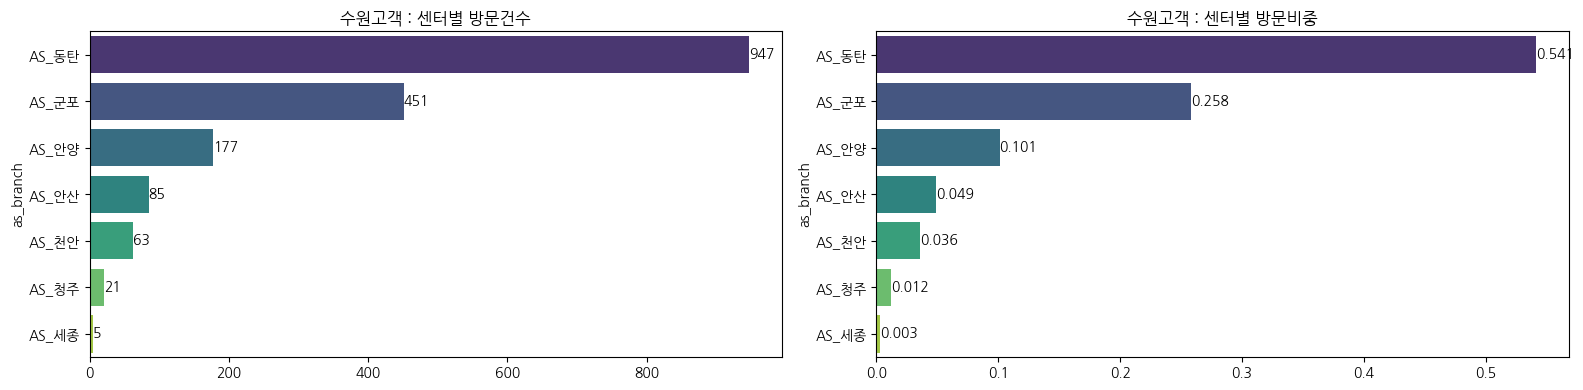

In [26]:
# 수원고객은 어느 센터를 많이 방문했는가? 

# 건수와 비중 데이터 생성
cnt_addr2_1 = df_suwon['as_branch'].value_counts()
cnt_addr2_2 = df_suwon['as_branch'].value_counts(normalize=True).round(3)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_1.values, y=cnt_addr2_1.index, palette="viridis", ax=axes[0])
axes[0].set_title('수원고객 : 센터별 방문건수')

for index, value in enumerate(cnt_addr2_1.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_2.values, y=cnt_addr2_2.index, palette="viridis", ax=axes[1])
axes[1].set_title('수원고객 : 센터별 방문비중')

for index, value in enumerate(cnt_addr2_2.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

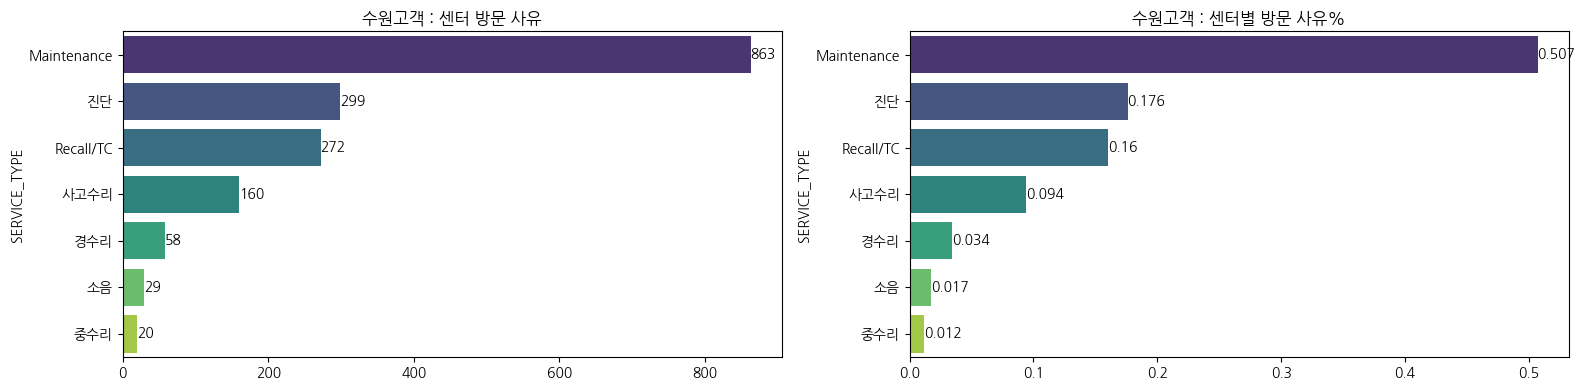

In [27]:
## 수원고객은 어떤 이유로 센터를 방문했는가?(서비스 타입)

# 건수와 비중 데이터 생성
cnt_addr2_3 = df_suwon['SERVICE_TYPE'].value_counts()
cnt_addr2_4 = df_suwon['SERVICE_TYPE'].value_counts(normalize=True).round(3)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_3.values, y=cnt_addr2_3.index, palette="viridis", ax=axes[0])
axes[0].set_title('수원고객 : 센터 방문 사유')

for index, value in enumerate(cnt_addr2_3.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_4.values, y=cnt_addr2_4.index, palette="viridis", ax=axes[1])
axes[1].set_title('수원고객 : 센터별 방문 사유%')

for index, value in enumerate(cnt_addr2_4.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

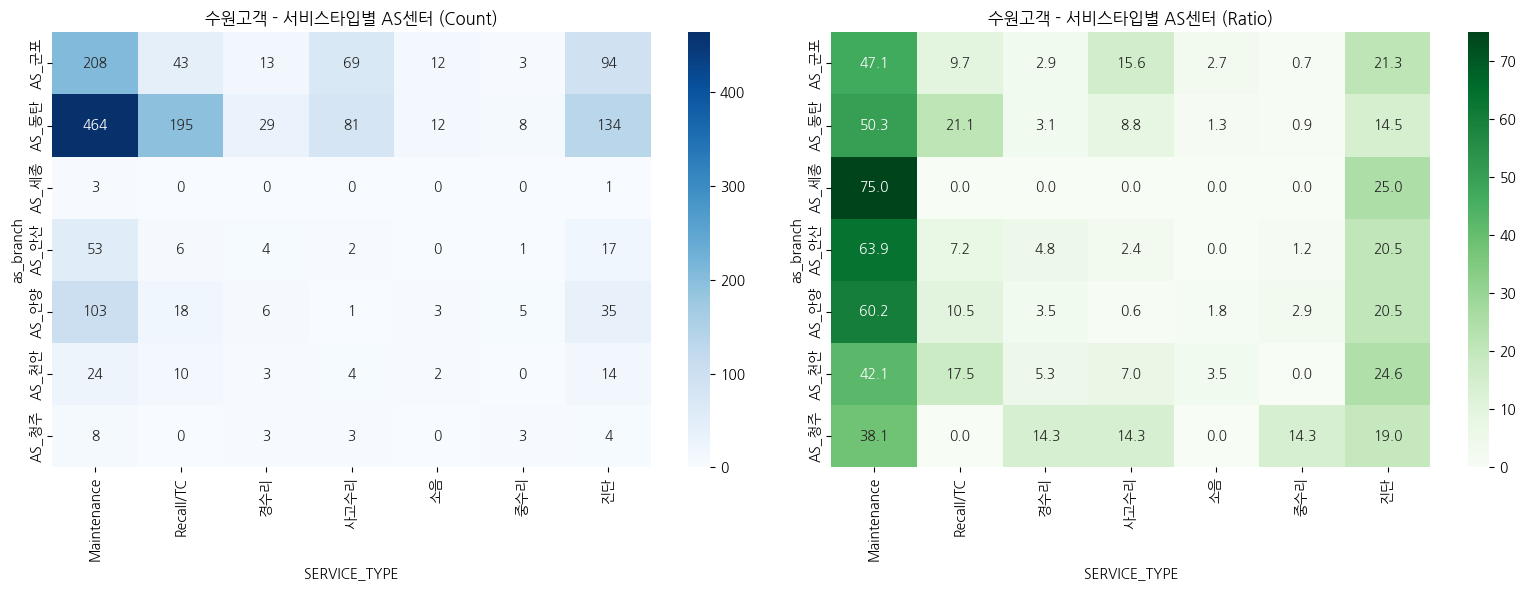

In [28]:
# 수원고객의 센터 방문 사유 x 센터별

svc_counts = df_suwon.groupby(['as_branch', 'SERVICE_TYPE']).size().reset_index(name='count')
svc_pivot = svc_counts.pivot(index='as_branch', columns='SERVICE_TYPE', values='count').fillna(0)
svc_ratio_pivot = svc_pivot.div(svc_pivot.sum(axis=1), axis=0) * 100
#svc_ratio_pivot = svc_pivot.div(svc_pivot.sum(axis=0), axis=1) * 100    #각 서비스 타입(열)을 기준으로 어느센터를 많이 갔는지 보려면 ...  


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(svc_pivot, cmap="Blues", annot=True, fmt="g", ax=axes[0])
axes[0].set_title('수원고객 - 서비스타입별 AS센터 (Count)')
axes[0].set_xlabel('SERVICE_TYPE')
axes[0].set_ylabel('as_branch')

sns.heatmap(svc_ratio_pivot, cmap="Greens", annot=True, fmt=".1f", ax=axes[1])
axes[1].set_title('수원고객 - 서비스타입별 AS센터 (Ratio)')
axes[1].set_xlabel('SERVICE_TYPE')
axes[1].set_ylabel('as_branch')

plt.tight_layout()

- 수원 고객들은 인근 동탄을 가장 많이 방문하였으며, 그다음 군포 순 
- 방문사유는 동일하게 maintenance와 진단이 1,2위이나 타센터와 다르게 리콜의 비중이 사고수리보다 좀더 높은 것이 특징 
- 군포와 동탄에서 리콜관련 어떤 프로모션을 진행했었나?

--- 
#### 3-4. 용인고객 상세 분석
---

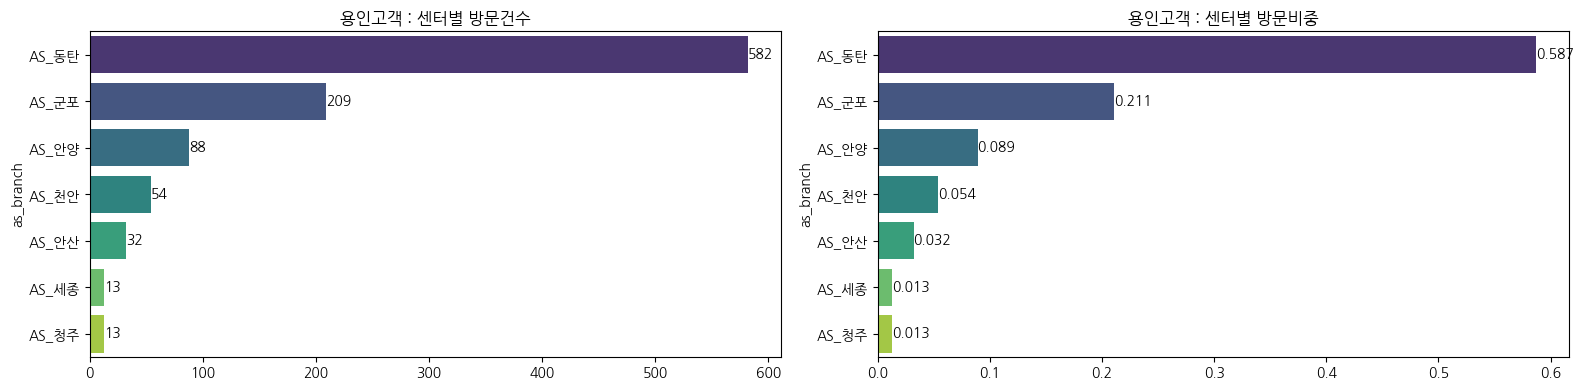

In [29]:
# 용인고객은 어느 센터를 많이 방문했는가? 

# 건수와 비중 데이터 생성
cnt_addr2_1 = df_yongin['as_branch'].value_counts()
cnt_addr2_2 = df_yongin['as_branch'].value_counts(normalize=True).round(3)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_1.values, y=cnt_addr2_1.index, palette="viridis", ax=axes[0])
axes[0].set_title('용인고객 : 센터별 방문건수')

for index, value in enumerate(cnt_addr2_1.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_2.values, y=cnt_addr2_2.index, palette="viridis", ax=axes[1])
axes[1].set_title('용인고객 : 센터별 방문비중')

for index, value in enumerate(cnt_addr2_2.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

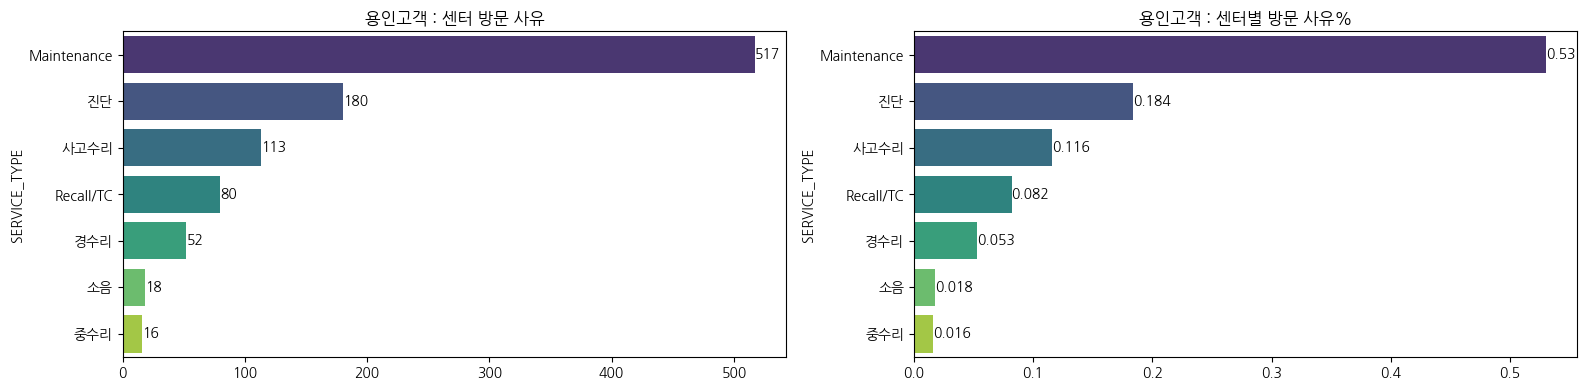

In [30]:
## 용인고객은 어떤 이유로 센터를 방문했는가?(서비스 타입)

# 건수와 비중 데이터 생성
cnt_addr2_3 = df_yongin['SERVICE_TYPE'].value_counts()
cnt_addr2_4 = df_yongin['SERVICE_TYPE'].value_counts(normalize=True).round(3)

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# 첫 번째 차트: 건수
sns.barplot(x=cnt_addr2_3.values, y=cnt_addr2_3.index, palette="viridis", ax=axes[0])
axes[0].set_title('용인고객 : 센터 방문 사유')

for index, value in enumerate(cnt_addr2_3.values):
    axes[0].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

# 두 번째 차트: 비중
sns.barplot(x=cnt_addr2_4.values, y=cnt_addr2_4.index, palette="viridis", ax=axes[1])
axes[1].set_title('용인고객 : 센터별 방문 사유%')

for index, value in enumerate(cnt_addr2_4.values):
    axes[1].text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()

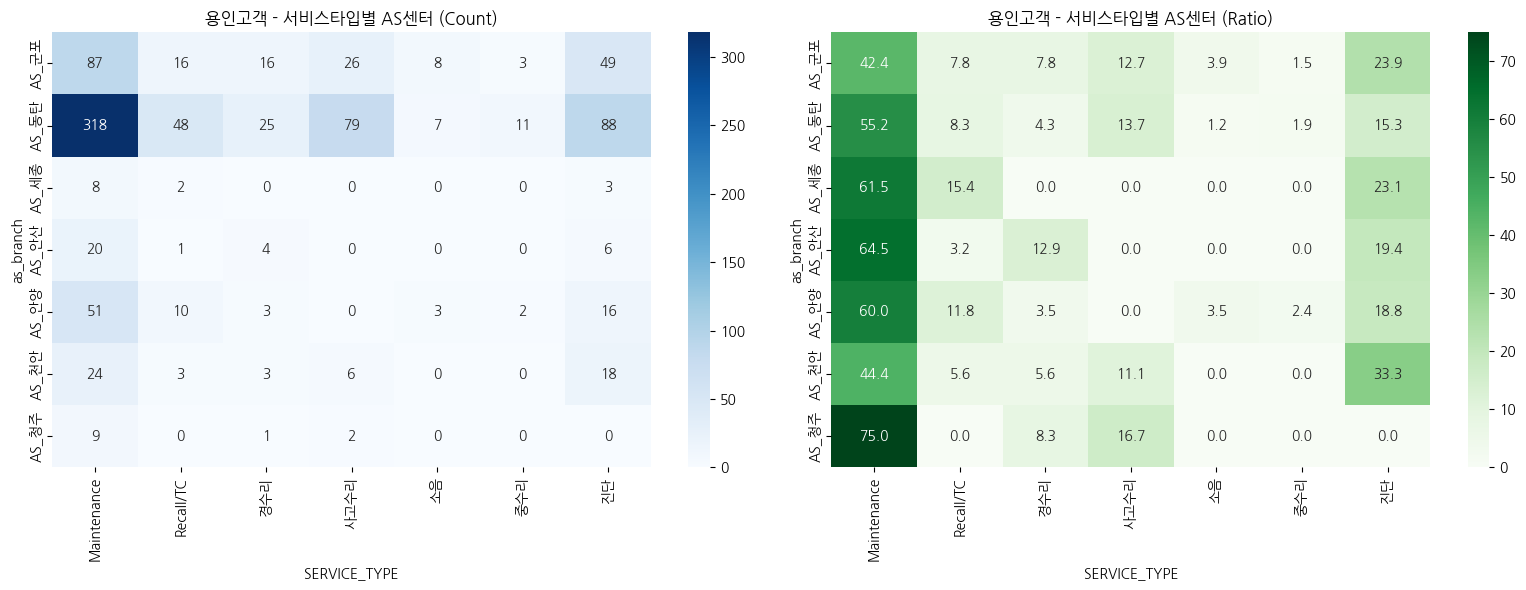

In [33]:
# 용인고객의 센터 방문 사유 x 센터별

svc_counts = df_yongin.groupby(['as_branch', 'SERVICE_TYPE']).size().reset_index(name='count')
svc_pivot = svc_counts.pivot(index='as_branch', columns='SERVICE_TYPE', values='count').fillna(0)
svc_ratio_pivot = svc_pivot.div(svc_pivot.sum(axis=1), axis=0) * 100
#svc_ratio_pivot = svc_pivot.div(svc_pivot.sum(axis=0), axis=1) * 100    #각 서비스 타입(열)을 기준으로 어느센터를 많이 갔는지 보려면 ...  


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(svc_pivot, cmap="Blues", annot=True, fmt="g", ax=axes[0])
axes[0].set_title('용인고객 - 서비스타입별 AS센터 (Count)')
axes[0].set_xlabel('SERVICE_TYPE')
axes[0].set_ylabel('as_branch')

sns.heatmap(svc_ratio_pivot, cmap="Greens", annot=True, fmt=".1f", ax=axes[1])
axes[1].set_title('용인고객 - 서비스타입별 AS센터 (Ratio)')
axes[1].set_xlabel('SERVICE_TYPE')
axes[1].set_ylabel('as_branch')

plt.tight_layout()

- 용인 고객들은 약 60%가 인근 동탄센터를 방문함. 그다음 군포/안양 순 (타지역 대비 동탄센터 한곳으로의 쏠림현상이 더 뚜렷함)
- 방문사유는 타지역과 동일하게 maintenance와 진단이 다수이며, 특히나 maintenance를 위해 동탄센터를 방문한 경우가 많았음 
--- 

### 서울/성남/수원/용인 거주 고객관점의 리뷰 

1. 해당지역 AS고객들 중 당사 출고는 약 1/4, 나머지 3/4는 타사 출고분 
2. 입고시 누적 주행거리는 대략 6만km 전후임 (BMW의 엔진/구동계 무상보증 마일리지(6만km)와 연관이 있는 것 아닐까?)
3. AS센터를 선택할때 역시 주소지와 가까운 곳이 가장 중요한 요인인 듯 
   (서울: 군포/안양, 성남: 안양/군포/동탄, 수원: 동탄/군포, 용인: 동탄/군포) 
4. AS센터를 찾는 사유는 공통적으로 maintenance와 진단이 가장 큰 이유임  

※ 전반적으로 거주지역별 어떤 차별점을 찾기는 어려웠으나, 서울과 성남고객들이 사고수리가 필요한 경우 군포와 동탄 센터를 고려하는 것 같다는 가설을 세울 수 있었음.
 
※ 특히 성남고객들이 가까운 안양센터를 우선적으로 고려하는 듯 함. 만약 안양센터에서 사고수리가 가능했다면 좀더 많은 서울&성남 고객들이 안양센터를 이용하지 않았을까? 